# Timeseries Comparison

In this notebook, we compare the impact on the fMRI timeseries that the respective nuisance-correction strategies used by FNGS and CPAC have on the resulting timeseries.

As CPAC does not produce intermediate derivatives, we unfortunately cannot make step-by-step comparisons, and instead must rely on end-timeseries to make our comparisons.

First, we will begin by visualizing the timeseries produced by each service:

In [66]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

fngs_ts = np.load('/home/eric/cmp/fngs/outputs/ts_roi/pp264-2mm/sub-0025864_ses-1_bold_pp264-2mm.npy')
cpac_ts = np.load('/home/eric/cmp/cpac/pipeline_HCPtest/sub-0025864_ses-1/roi_timeseries/_scan_rest_1_rest/_csf_threshold_0.96/_gm_threshold_0.7/_wm_threshold_0.96/_compcor_ncomponents_5_selector_pc10.linear1.wm0.global0.motion1.quadratic1.gm0.compcor1.csf0/_mask_pp264-2mm/roi_pp264-2mm.npz')['roi_data']

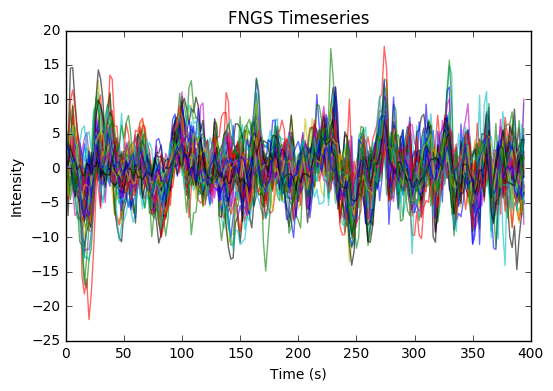

In [67]:
fig = plt.figure()
tr = 2
ax = fig.add_subplot(111)
print 
# visualize FNGS timeseries
ax.plot(np.arange(0, fngs_ts.shape[1]*tr, tr), np.transpose(fngs_ts), alpha=0.6)
ax.set_ylabel('Intensity')
ax.set_xlabel('Time (s)')
ax.set_title('FNGS Timeseries')
fig.show()

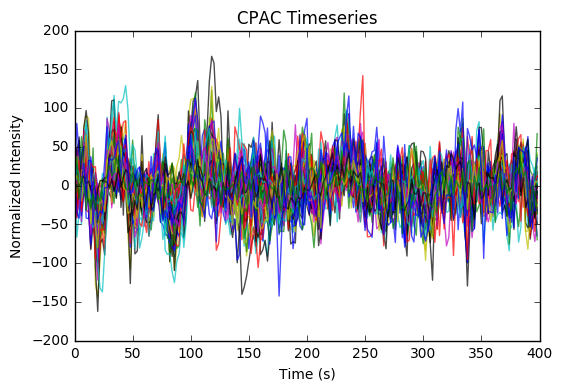

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111)
# visualize CPAC timeseries
ax.plot(np.arange(0, cpac_ts.shape[1]*tr, tr), cpac_ts.transpose(), alpha=0.7)
ax.set_ylabel('Normalized Intensity')
ax.set_xlabel('Time (s)')
ax.set_ylim([-200, 200])
ax.set_title('CPAC Timeseries')
fig.show()

## Things to Note:

CPAC timeseries has been z-scored by default. Also of note, the CPAC timeseries clearly removes much of the global trending. The timeseries appears relatively "flat" in comparison due to the WM compcor. 

Note that the CPAC timeseries has some clear low-frequency drift present (particularly, you can see there is a gradual upwards trend from 150 - 250 seconds, and then a slow downwards trend to 300 s, and then again an upwards trend, etc).

Also, note that the CPAC timeseries appear to be slightly decorrelated. This is because aCompCor can behave similarly to Global Signal Regression, in that it can remove some of the global fluctuations that may be present, which are thought to be due to physiological noise, ie heartbeat, breathing, etc.

# Correlation Comparison

Next, we look at the correlation matrices produced. We note that the CPAC timeseries above has much of the global correlation between timeseries removed due to the WM compcor that is performed. We would expect to get significantly sparser connectomes as a result:

(58, 198)


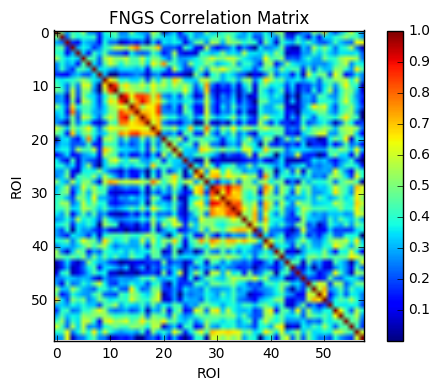

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(np.abs(np.corrcoef(fngs_ts)))
ax.set_xlabel('ROI')
ax.set_ylabel('ROI')
ax.set_title('FNGS Correlation Matrix')
cbar = fig.colorbar(cax)
fig.show()

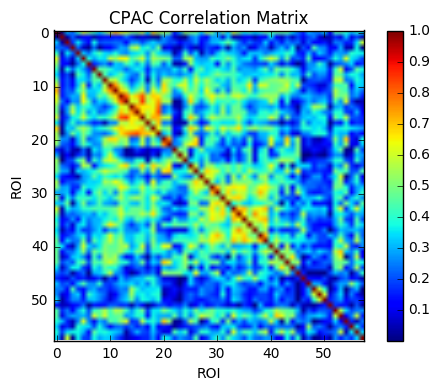

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(np.abs(np.corrcoef(cpac_ts)))
ax.set_xlabel('ROI')
ax.set_ylabel('ROI')
ax.set_title('CPAC Correlation Matrix')
cbar = fig.colorbar(cax)
fig.show()

The resulting correlation matrices look quite different, probably as a result of the vastly different nuisance correction approaches. However, we can note in both images some sort of "hub" between the 10th -> 20th vertices, and the 30th -> 40th vertices.